## Keras Quick Reference

- Official document: https://keras.io/layers/normalization/
- Reference 1: https://keras.io/getting-started/sequential-model-guide/
- Reference 2: https://machinelearningmastery.com/introduction-python-deep-learning-library-keras/

**Steps to build neural network with Keras**:
1. Construct Model
2. Compile Model
3. Fit Model
4. Evaluate Model
5. Generate Predictions

In [1]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import tensorflow

Using TensorFlow backend.


In [2]:
np.random.seed(123)  # set random seed for repeatibility
print(K._BACKEND) # check backend

tensorflow


## Load data

In [3]:
# load pima indians dataset
dataset = np.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [4]:
print("X.shape:", X.shape)
print("Y.shape:", Y.shape)

X.shape: (768, 8)
Y.shape: (768,)


## Construct the neural network
*Need specify input shape to the first layer*:
- **input_shape** is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). In input_shape, the batch dimension is not included.
- Some 2D layers, such as Dense, support the specification of their input shape via the argument **input_dim**, and some 3D temporal layers support the arguments input_dim and **input_length**.
- If you ever need to specify a fixed batch size for your inputs (this is useful for stateful recurrent networks), you can pass a **batch_size** argument to a layer. If you pass both batch_size=32 and input_shape=(6, 8) to a layer, it will then expect every batch of inputs to have the batch shape (32, 6, 8).

In [5]:
# construct a model
model = Sequential()
model.add(Dense(units=12, input_dim=8, activation='relu'))  # 8 features
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Another way to construct a model
model = Sequential([
    Dense(12, input_shape=(8,)),
    Activation('relu'),
    Dense(8),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid'),
])

## Compile model
*Compile a model means to configure the learning process. It has three arguments*:

A **loss function**. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. 
- binary_crossentropy
- categorical_crossentropy 
- sparse_categorical_crossentropy 
- poisson 
- hinge 
- categorical_hinge 
- mean_absolute_error 
- mean_squared_error

An **optimizer**. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.
- SGD 
- RMSprop 
- Adam 
- Nadam 
- Adamax

A list of **metrics**. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function. A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function.
- For any classification problem, set metrics=['accuracy']

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit model
- Input data and labels need to be Numpy arrays --just like in the Scikit-Learn API.


In [9]:
model.fit(X, Y, epochs=20, batch_size=20, verbose=1)

Epoch 1/20
768/768 [==============================] - 0s 124us/step - loss: 0.6788 - acc: 0.6615
Epoch 2/20
768/768 [==============================] - 0s 99us/step - loss: 0.6764 - acc: 0.6602
Epoch 3/20
768/768 [==============================] - 0s 105us/step - loss: 0.6459 - acc: 0.6719
Epoch 4/20
768/768 [==============================] - 0s 96us/step - loss: 0.6414 - acc: 0.6771
Epoch 5/20
768/768 [==============================] - 0s 103us/step - loss: 0.6336 - acc: 0.6784
Epoch 6/20
768/768 [==============================] - 0s 107us/step - loss: 0.6390 - acc: 0.6797
Epoch 7/20
768/768 [==============================] - 0s 93us/step - loss: 0.6452 - acc: 0.6784
Epoch 8/20
768/768 [==============================] - 0s 103us/step - loss: 0.6481 - acc: 0.6693
Epoch 9/20
768/768 [==============================] - 0s 99us/step - loss: 0.6159 - acc: 0.6615
Epoch 10/20
768/768 [==============================] - 0s 95us/step - loss: 0.6155 - acc: 0.6888
Epoch 11/20
768/768 [=============

## Evaluate model

In [10]:
scores = model.evaluate(X, Y, batch_size=128)
print(model.metrics_names[1], scores[1]*100)

768/768 [==============================] - 0s 13us/step
acc 70.1822916667


## Predict on new data

In [11]:
predictions = model.predict(X)
predicted_class = [1 if x >= 0.5 else 0 for x in predictions]

## Model summary

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## Plot model structure 

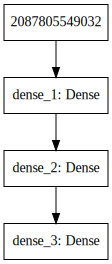

In [13]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model, to_file='my_model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Save Keras models to disk

In [ ]:
# use ResNet50 as an example model
from keras.applications import resnet50
my_model = resnet50.ResNet50(include_top=True, weights='imagenet')
my_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels.h5')
my_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
my_model.fit(X, Y, epochs=30, batch_size=12, verbose=0)
scores = my_model.evaluate(X, Y, verbose=0)
print(my_model.metrics_names[1], ": \n", scores[1]*100)

Option 1: Save the **entire** model

In [ ]:
from keras.models import model_from_json, load_model
import json

# save entire model
my_model.save('my_model.h5')

# load model
loaded_model = load_model('my_model.h5')

Option 2: Save **Weights + Architecture** to JSON

In [ ]:
# save Weights + Architecture
my_model.save_weights('my_model_weights.h5')
with open('my_model_architecture.json', 'w') as f:
    f.write(my_model.to_json())

# load Weights + Architecture
with open('my_model_architecture.json', 'r') as f:
    loaded_model = model_from_json(f.read())
loaded_model.load_weights('my_model_weights.h5')

Option 3: Save **Weights + Architecture** to YAML

In [ ]:
# save Weights + Architecture
my_model.save_weights("my_model_weights.h5")
with open("my_model_architecture.yaml", "w") as f:
    f.write(my_model.to_yaml())

# load Weights + Architecture
with open('my_model_architecture.yaml', 'r') as f:
    loaded_model = model_from_yaml(f.read())
loaded_model.load_weights('my_model_weights.h5')

Evaluate loaded model on test data

In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
scores = loaded_model.evaluate(X, Y, verbose=0)
print(loaded_model.metrics_names[1], ': \n', scores[1]*100)

## More examples

#### For a single-input model with 2 classes (binary classification):

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

#### For a single-input model with 10 classes (categorical classification):

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

#### Multilayer Perceptron (MLP) for multi-class softmax classification:

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

#### MLP for binary classification:

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

#### Sequence classification with LSTM:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

#### Sequence classification with 1D convolutions:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 64

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

#### Stacked LSTM for sequence classification
In this model, we stack 3 LSTM layers on top of each other, making the model capable of learning higher-level temporal representations.

The first two LSTMs return their full output sequences, but the last one only returns the last step in its output sequence, thus dropping the temporal dimension (i.e. converting the input sequence into a single vector).
<img src="images/regular_stacked_lstm.png" style="width:250px;height:250px;">

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

#### Same stacked LSTM model, rendered "stateful"
A stateful recurrent model is one for which the internal states (memories) obtained after processing a batch of samples are reused as initial states for the samples of the next batch. This allows to process longer sequences while keeping computational complexity manageable.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))
